<font colour = "black">

## Sales Performance Analysis for Deltoid Holdings 

---
    
### Background
    
In this analysis, I will explore the comprehensive dataset of *Deltoid Holdings*, a flourishing superstore, to gain insights and understanding. With the goal of enhancing customer patronage, streamlining processes, and boosting the bottom line, this report presents a thorough examination of the store's sales performance.
    
The data collection at hand encompasses a wealth of information, enabling us to gain valuable insights into customer orders, shipment dates for goods and services, and the specific regions to which the consumers belong. This expansive data provides a holistic view of the supermarket's operations, empowering us to conduct an in-depth analysis.
    
Segmentation plays a crucial role in understanding the diverse end users of the superstore's products. By categorizing market segments into areas such as 'corporate' and 'home office,' and examining their buying behavior, I gain a deeper understanding of the distinct customer groups, their preferences, and can tailor strategies to better cater to their unique needs.
    
Comprising 26 columns and approximately 10,000 rows, this dataset offers a rich tapestry of information, presenting ample opportunities for detailed analysis. As a data analyst, I will utilize Power BI as my tool of analysis and visualization to harness the power of this data, uncovering meaningful patterns, trends, and opportunities for improvement. The data will also be loaded into Pandas to perform exploratory data analysis.
    
Through this sales analysis, I aim to provide actionable insights that will drive decision-making, foster stronger customer relationships, optimize operational efficiency, and ultimately boost the superstore's profitability.
    
In conclusion, this sales report holds significant potential for driving customer engagement and boosting the overall profitability of *Deltoid Holdings*. Through meticulous analysis of the dataset's diverse information, I will uncover invaluable insights that will shape impactful business strategies and pave the way for long-term success.

<font color="black"> 

### Loading the Dataset into Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel('Superstore_Dataset.xlsx')

<font colour = "black">
    
### Understanding the Data    

In [4]:
data.head()

,Row ID,Order ID,Seperated Order Year,Seperated Order ID,Order Date,Ship Date,Date Difference (Ship Date - Order Date),Ship Mode,Customer ID,Derived Customer ID,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
0,1,CA-2016-152156,2016,152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,12520,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,440.0928
1,2,CA-2016-152156,2016,152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,12520,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,1537.0740
2,3,CA-2016-138688,2016,138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,13045,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,15.4972
3,4,US-2015-108966,2015,108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,20335,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,6703.0425
4,5,US-2015-108966,2015,108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,20335,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,39.7032


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Row ID                                    9994 non-null   int64         
 1   Order ID                                  9994 non-null   object        
 2   Seperated  Order Year                     9994 non-null   int64         
 3   Seperated Order ID                        9994 non-null   int64         
 4   Order Date                                9994 non-null   datetime64[ns]
 5   Ship Date                                 9994 non-null   datetime64[ns]
 6   Date Difference (Ship Date - Order Date)  9994 non-null   int64         
 7   Ship Mode                                 9994 non-null   object        
 8   Customer ID                               9994 non-null   object        
 9   Derived Customer ID           

<font colour = "black">
    
### Summary Statistics
Performing a univariate analysis on the given data. The primary objective is to understand the distribution, characteristics, and patterns of a single superstore variable and gain insights specific to it.

In [5]:
data.describe()

,Row ID,Seperated Order Year,Seperated Order ID,Date Difference (Ship Date - Order Date),Derived Customer ID,Postal Code,Sales,Quantity,Discount,Profit,Revenue
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2015.722934,134439.462578,3.958175,16037.638083,55190.379428,229.858001,3.789574,0.156203,28.656896,1006.367170
std,2885.163629,1.124039,20252.152240,1.747567,3428.866825,32063.693350,623.245101,2.225110,0.206452,234.260108,3471.367668
min,1.000000,2014.000000,100006.000000,0.000000,10015.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.554400
25%,2499.250000,2015.000000,117157.750000,3.000000,13045.000000,23223.000000,17.280000,2.000000,0.000000,1.728750,36.720000
50%,4997.500000,2016.000000,133616.500000,4.000000,16120.000000,56430.500000,54.490000,3.000000,0.200000,8.666500,140.140000
75%,7495.750000,2017.000000,152072.000000,5.000000,18985.000000,90008.000000,209.940000,5.000000,0.200000,29.364000,640.675925
max,9994.000000,2017.000000,169999.000000,7.000000,21925.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,146697.350400


In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Seperated  Order Year ', 'Seperated Order ID',
       'Order Date', 'Ship Date', 'Date Difference (Ship Date - Order Date)',
       'Ship Mode', 'Customer ID', 'Derived Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Revenue'],
      dtype='object')

<font colour = "black">

### Data Cleaning and Preprocessing
    
Conduct a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.    

In [10]:
data.isnull().sum()

Row ID                                      0
Order ID                                    0
Seperated  Order Year                       0
Seperated Order ID                          0
Order Date                                  0
Ship Date                                   0
Date Difference (Ship Date - Order Date)    0
Ship Mode                                   0
Customer ID                                 0
Derived Customer ID                         0
Customer Name                               0
Segment                                     0
Country                                     0
City                                        0
State                                       0
Postal Code                                 0
Region                                      0
Product ID                                  0
Category                                    0
Sub-Category                                0
Product Name                                0
Sales                             

In [12]:
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.duplicated().sum()

0

In [17]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

<font color="black"> 
    
### Establishing Strength of Association Between Variables

In [48]:
##Computing the correlation matrix for the superstore dataset
data.corr()

,Row ID,Seperated Order Year,Seperated Order ID,Date Difference (Ship Date - Order Date),Derived Customer ID,Postal Code,Sales,Quantity,Discount,Profit,Revenue
Row ID,1.000000,0.015160,0.014061,-0.001446,-0.003443,0.009671,-0.001359,-0.004016,0.013480,0.012497,-0.005525
Seperated Order Year,0.015160,1.000000,-0.005793,-0.022253,-0.041331,0.004539,-0.009800,-0.005788,-0.002615,0.004618,-0.016579
Seperated Order ID,0.014061,-0.005793,1.000000,-0.036821,0.012240,-0.009216,0.004900,-0.010449,0.008623,-0.002783,-0.000434
Date Difference (Ship Date - Order Date),-0.001446,-0.022253,-0.036821,1.000000,-0.024818,-0.009771,-0.007354,0.018298,0.000408,-0.004649,-0.002071
Derived Customer ID,-0.003443,-0.041331,0.012240,-0.024818,1.000000,0.009638,0.016919,0.018850,0.025287,0.000413,0.019002
Postal Code,0.009671,0.004539,-0.009216,-0.009771,0.009638,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.014981
Sales,-0.001359,-0.009800,0.004900,-0.007354,0.016919,-0.023854,1.000000,0.200795,-0.028190,0.479064,0.853684
Quantity,-0.004016,-0.005788,-0.010449,0.018298,0.018850,0.012761,0.200795,1.000000,0.008623,0.066253,0.321494
Discount,0.013480,-0.002615,0.008623,0.000408,0.025287,0.058443,-0.028190,0.008623,1.000000,-0.219487,0.047267
Profit,0.012497,0.004618,-0.002783,-0.004649,0.000413,-0.029961,0.479064,0.066253,-0.219487,1.000000,0.095726


---

With the aid of seaborn and matplotlib, I plotted a heatmap of the variables using the computed correlation matrix. This is to show the strength of association between the variables and also those that are strongly related. 

It can be inferred that revenue and sales are strongly positively correlated, and there is a high association between sales and profit. Additionally, there is a negative relationship between discount and profit.

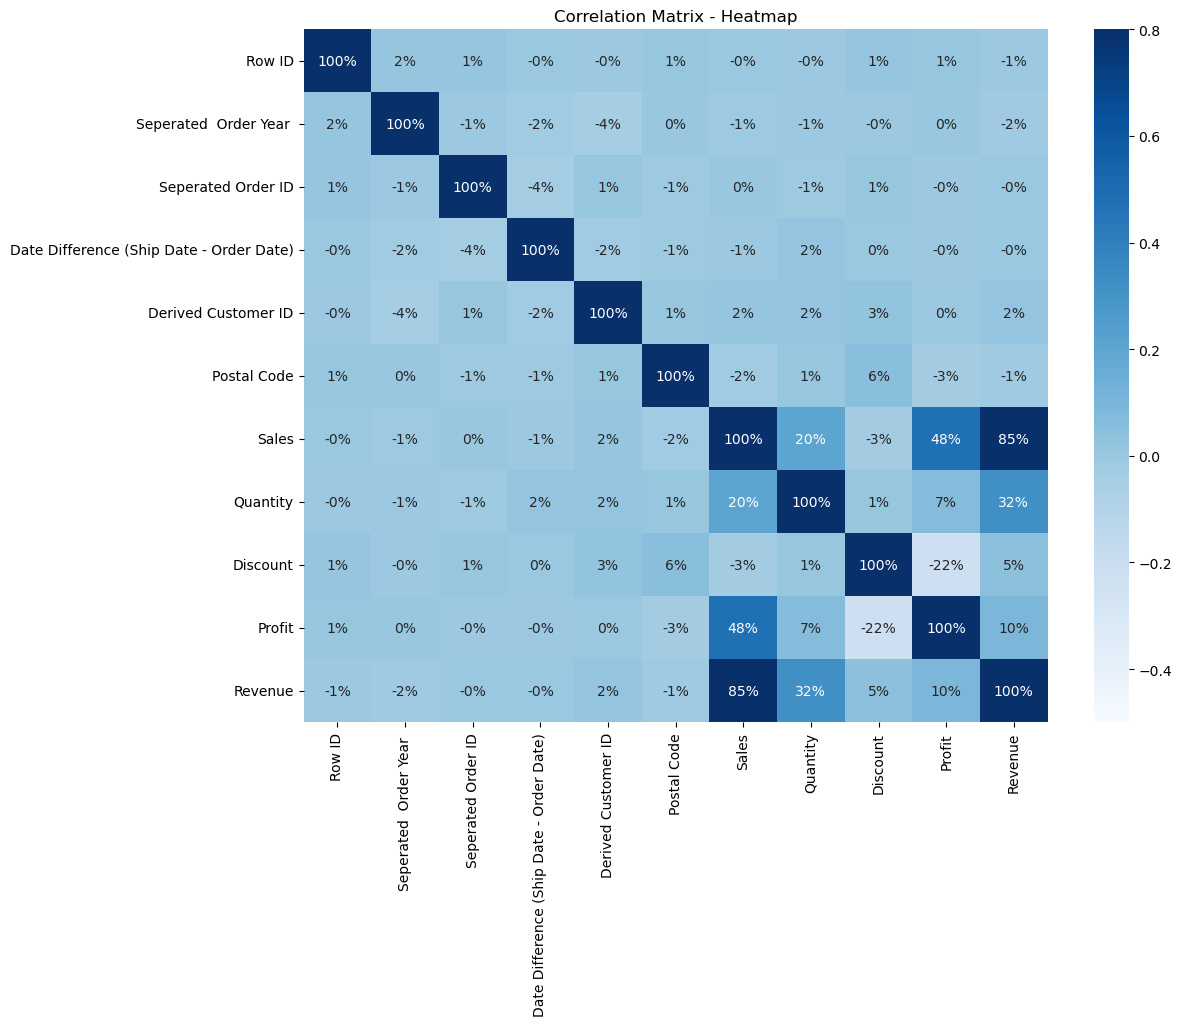

In [113]:
corr_matrix = data.corr()

# Sort the correlation matrix by varaibles
sorted_corr_matrix = corr_matrix.reindex(['Profit'])

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt = '.0%', vmin = -0.5, vmax = 0.8)
plt.title('Correlation Matrix - Heatmap')
plt.xticks(rotation=90)
plt.show()

<font colour="black">
    
### Selecting the Independent and Dependent Variables; Splitting the Data into Training and Test Sets

In [123]:
# Select the X variables and y variable
X = data[['Sales', 'Quantity', 'Revenue', 'Discount']]
y = data['Profit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font colour="black">
    
### Feature Importance
Here, I'll sort the features and their values in descending order. 

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
feature_importances.head()

Feature Importances:


,Feature,Importance
0,Sales,0.606112
2,Revenue,0.242467
3,Discount,0.125436
1,Quantity,0.025985


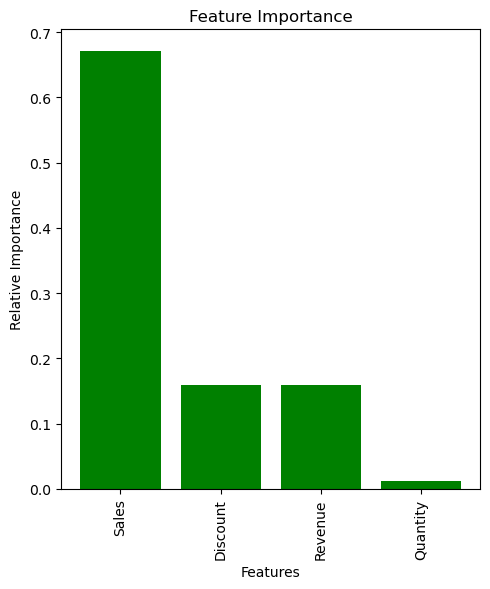

In [119]:
# Plotting the feature importances
plt.figure(figsize=(5, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

---
The transformed dataset was eventually saved to a csv file..

In [118]:
# Saving the project to a csv file 
file = 'C:/Users/Admin/Desktop/Portfolio Analysis/Superstore Analytics/Processed_Superstore_Dataset.csv'
data.to_csv(file, index=False)

<font colour="black">
    
### Visualization and Business Intelligence
This is the generation of visual reports that provide meaningful insights into different features within the dataset.  
    
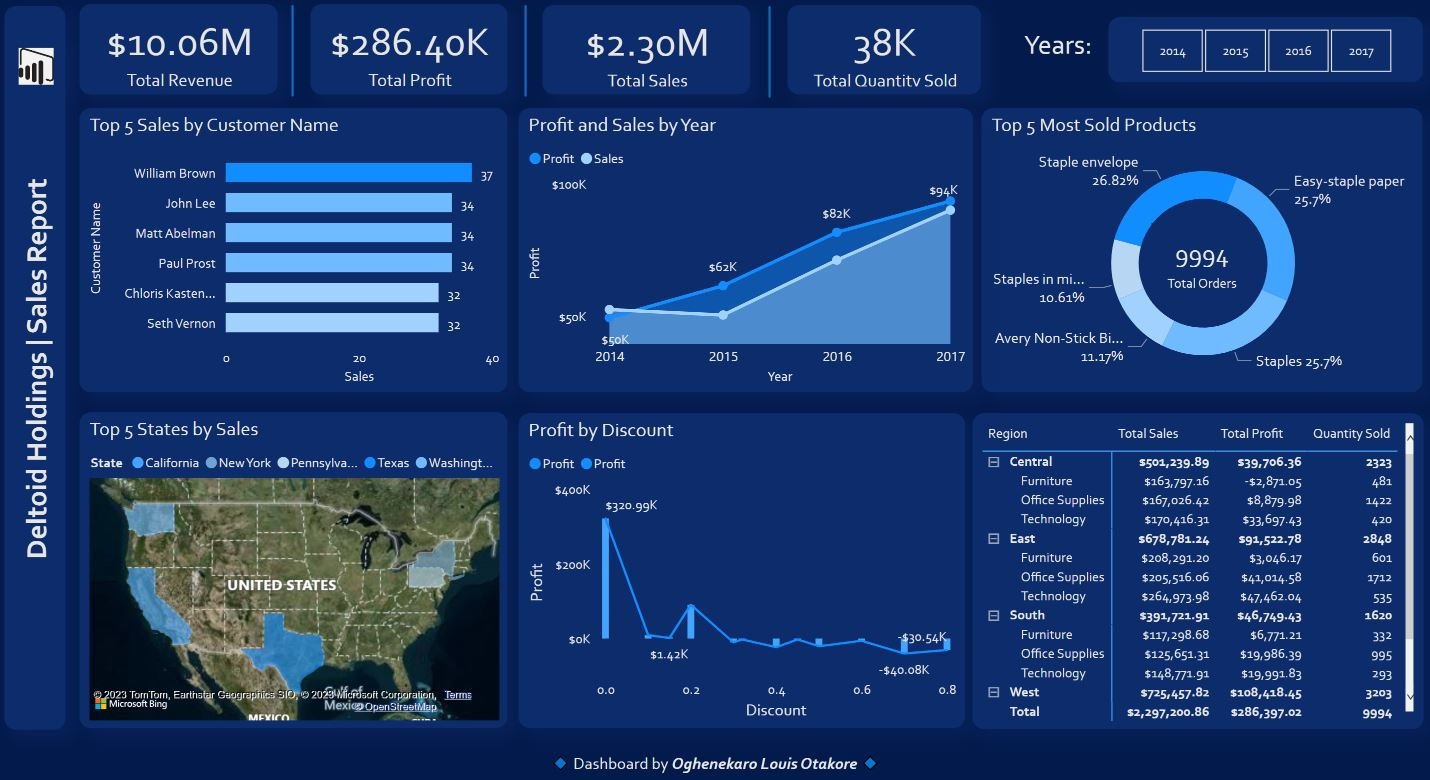    
    
---
    
Notable findings and actionable insights include: 

1. The analysis reveals a strong negative correlation between discount levels and profitability. As the discount offered on    products or services increases, the profit margin diminishes.

   The finding indicates that higher discount levels have a detrimental impact on profitability. It implies that the cost      of providing discounts outweighs the potential revenue gained from increased sales. It is crucial for the business to      carefully evaluate the trade-off between attracting customers through discounts and maintaining a healthy profit            margin.

    
    
2. The finding that the sales figures declined by 2.83% from 2014 to 2015 while the profit and sales values are positively    correlated provides an important business insight. It suggests that despite the decline in sales, there is a positive      relationship between profit and sales. 

   This indicates that higher sales volumes generally lead to higher profitability, even though there was a temporary          setback in sales during this period.
    
### Recommendations
Based on these findings, the following strategies can be adopted:
    
1.	*Deltoid Holdings* can perform a thorough analysis to identify the discount thresholds at which profit margins significantly decline. Determine the optimal discount range that strikes a balance between customer attraction and profitability. Adjust discount levels accordingly to ensure that the business maintains a sustainable profit margin. 
    
    
2.	The superstore can also analyze customer segments to identify the most profitable and high-potential segments. Tailor marketing and sales strategies to cater specifically to these segments, leveraging personalized offers, targeted campaigns, and superior customer service to drive both sales and profitability.
    
### Conclusion
The sales analysis of *Deltoid Holdings* offers valuable insights into the performance and opportunities for growth. By thoroughly examining the sales data, we have uncovered significant findings that can guide strategic decision-making and drive business success.

Our analysis highlights the importance of continuously monitoring sales performance, customer preferences, and market dynamics. It is crucial for the superstore to adapt and refine its strategies based on these insights to remain competitive in a rapidly changing business environment.
    
This sales analysis serves as a foundation for future decision-making, enabling the superstore to make data-driven choices and align its efforts with market demands. By leveraging the insights gained from this analysis, the superstore can position itself for sustainable success in the dynamic retail landscape.    
    
In summary, this report provides actionable recommendations for the superstore. By capitalizing on the identified opportunities and aligning strategies with market trends, *Deltoid Holdings* can navigate challenges, drive growth, and enhance its position in the marketplace.
    